In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from yellowbrick.cluster import KElbowVisualizer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [69]:
df = pd.read_csv('LifeExpectancyData.csv')
df.dropna(inplace=True)
data= df.head(n=100)
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Austria,2012,Developed,88.0,7.0,0,12.26,7878.372355,92.0,36,...,92.0,11.17,92.0,0.1,48333.572730,8429991.0,1.8,2.0,0.884,15.7
132,Austria,2011,Developed,88.0,73.0,0,12.04,8272.306757,89.0,68,...,89.0,1.94,89.0,0.1,51126.741390,8391643.0,1.7,2.0,0.880,15.7
133,Austria,2010,Developed,84.0,75.0,0,12.10,7423.228774,86.0,52,...,86.0,11.17,86.0,0.1,46657.629000,836344.0,1.7,1.9,0.872,15.4
134,Austria,2009,Developed,82.0,77.0,0,11.30,8053.557638,83.0,49,...,83.0,11.19,83.0,0.1,47654.187210,8343323.0,1.7,1.9,0.870,15.3


In [70]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.00000
mean,2008.140000,71.682000,134.400000,22.580000,5.292900,1547.088610,82.950000,838.040000,42.459000,31.230000,84.060000,6.519900,83.810000,0.288000,10129.819907,9.048369e+06,4.954000,4.788000,0.695090,13.26900
std,4.141488,9.913824,108.279381,32.020568,3.951011,3088.524047,18.304592,1919.599937,19.864745,46.312259,20.846636,2.184651,20.620523,0.643111,17972.718543,1.370323e+07,6.051436,5.880773,0.166442,3.89858
min,2000.000000,48.200000,1.000000,0.000000,0.010000,1.388648,8.000000,0.000000,2.400000,0.000000,5.000000,1.600000,5.000000,0.100000,25.294130,2.941000e+03,0.600000,0.600000,0.338000,5.50000
25%,2005.000000,72.225000,66.000000,1.000000,0.552500,45.933436,71.250000,2.750000,19.250000,1.000000,82.500000,4.940000,81.500000,0.100000,534.702492,2.591608e+05,1.175000,1.000000,0.642750,10.70000
50%,2008.500000,74.300000,119.000000,1.000000,4.950000,232.106297,91.000000,58.500000,51.750000,2.000000,92.000000,6.255000,92.000000,0.100000,3283.113253,2.876446e+06,2.000000,2.100000,0.721000,12.55000
75%,2012.000000,76.675000,141.000000,21.000000,8.292500,751.367721,95.000000,696.000000,56.950000,24.000000,96.000000,8.312500,95.000000,0.100000,5495.106489,8.442337e+06,6.025000,5.900000,0.805500,16.30000
max,2015.000000,88.000000,375.000000,88.000000,12.320000,11734.853810,99.000000,11699.000000,66.100000,138.000000,99.000000,11.210000,99.000000,2.600000,67792.338600,4.298152e+07,19.900000,19.900000,0.936000,20.70000


In [68]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])


# Correlation matrix
corr_matrix = numeric_data.corr()

corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.165112,-0.080794,-0.034651,-0.049175,0.079205,0.113915,-0.082674,0.093901,-0.039550,0.107017,0.089681,0.144596,-0.129380,0.120619,0.022410,-0.043158,-0.047097,0.239303,0.214167
Life expectancy,0.165112,1.000000,-0.690840,-0.196341,0.404877,0.398166,0.245623,-0.162945,0.570221,-0.222142,0.462395,0.216436,0.477175,-0.561442,0.462977,-0.022514,-0.477895,-0.472087,0.712616,0.746054
Adult Mortality,-0.080794,-0.690840,1.000000,0.075614,-0.195848,-0.249481,-0.158937,0.031937,-0.388911,0.090785,-0.268753,-0.113368,-0.271332,0.527458,-0.294106,-0.013754,0.304185,0.309793,-0.442067,-0.440766
infant deaths,-0.034651,-0.196341,0.075614,1.000000,-0.116647,-0.089048,-0.233409,0.491652,-0.228214,0.996754,-0.174337,-0.128935,-0.178598,0.023646,-0.108481,0.563706,0.463174,0.469071,-0.145481,-0.200939
Alcohol,-0.049175,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.035376,-0.432302,-0.420862,0.450254,0.548001
percentage expenditure,0.079205,0.398166,-0.249481,-0.089048,0.341112,1.000000,0.018998,-0.060251,0.245836,-0.091375,0.153597,0.175977,0.150534,-0.103432,0.920371,-0.027173,-0.261768,-0.263247,0.400961,0.415525
Hepatitis B,0.113915,0.245623,-0.158937,-0.233409,0.086217,0.018998,1.000000,-0.129758,0.153293,-0.242252,0.475665,0.070983,0.586746,-0.109692,0.080667,-0.127934,-0.128133,-0.130057,0.191844,0.214827
Measles,-0.082674,-0.162945,0.031937,0.491652,-0.052569,-0.060251,-0.129758,1.000000,-0.178146,0.500086,-0.142431,-0.106635,-0.148450,0.030885,-0.077061,0.269529,0.219555,0.215888,-0.136016,-0.148831
BMI,0.093901,0.570221,-0.388911,-0.228214,0.338253,0.245836,0.153293,-0.178146,1.000000,-0.238703,0.294051,0.238510,0.291510,-0.245227,0.302118,-0.075250,-0.535360,-0.541752,0.505352,0.557419
under-five deaths,-0.039550,-0.222142,0.090785,0.996754,-0.113388,-0.091375,-0.242252,0.500086,-0.238703,1.000000,-0.192490,-0.130434,-0.199124,0.036239,-0.112135,0.549699,0.466063,0.470783,-0.163429,-0.216470


In [58]:
# Kurtosis
kurtosis = numeric_data.kurtosis()
print("\nKurtosis:")
print(kurtosis)


Kurtosis:
Year                              -1.040928
Life expectancy                   -1.712278
Adult Mortality                   -1.615700
infant deaths                     -1.707939
Alcohol                           -1.706408
percentage expenditure            -0.749320
Hepatitis B                        2.646145
Measles                            9.600475
 BMI                              -1.892573
under-five deaths                 -1.690957
Polio                              0.622081
Total expenditure                 -0.829233
Diphtheria                         0.764158
 HIV/AIDS                          0.000000
GDP                               -0.990590
Population                        -0.045783
 thinness  1-19 years             -1.627910
 thinness 5-9 years               -1.468261
Income composition of resources   -1.559289
Schooling                         -0.804362
dtype: float64


In [59]:
# Skewness
skewness = numeric_data.skew()
print("\nSkewness:")
print(skewness)



Skewness:
Year                              -0.247008
Life expectancy                   -0.446263
Adult Mortality                    0.227964
infant deaths                      0.379820
Alcohol                            0.495805
percentage expenditure             0.948966
Hepatitis B                       -1.320570
Measles                            2.918371
 BMI                              -0.195787
under-five deaths                  0.430995
Polio                             -1.234657
Total expenditure                  0.113547
Diphtheria                        -1.225298
 HIV/AIDS                          0.000000
GDP                                0.872316
Population                         1.319118
 thinness  1-19 years              0.534756
 thinness 5-9 years                0.661447
Income composition of resources   -0.474337
Schooling                         -0.352233
dtype: float64


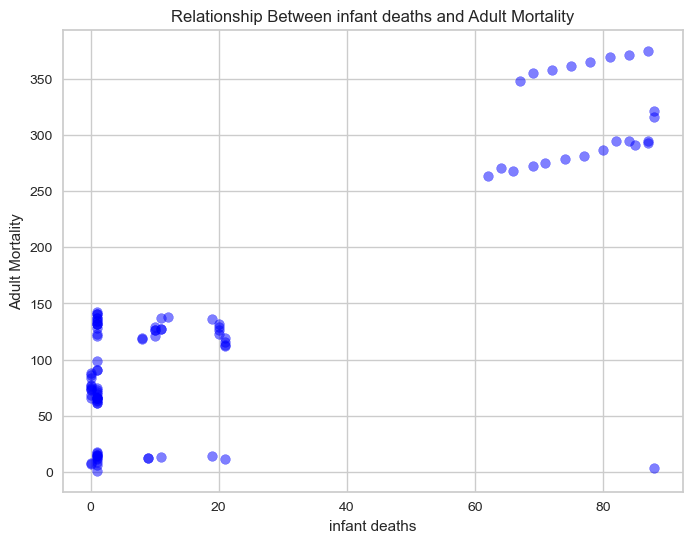

In [71]:

def create_relational_graph(x, y):
    """
    Create a scatter plot to visualize the relationship between two variables.

    Parameters:
    x (array-like): Data for the x-axis.
    y (array-like): Data for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.xlabel('infant deaths')
    plt.ylabel('Adult Mortality')
    plt.title('Relationship Between infant deaths and Adult Mortality')
    plt.grid(True)
    plt.show()


create_relational_graph(data['infant deaths'], data['Adult Mortality'])

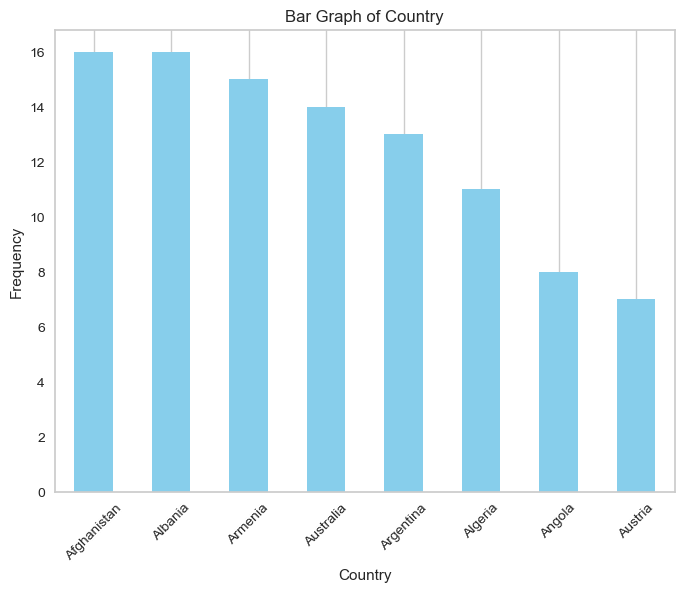

In [72]:


def plot_column_bar(data, column_name):
    """
    Create a bar graph to visualize the distribution of a specified categorical column in the dataset.

    Parameters:
    data (DataFrame): Pandas DataFrame containing the dataset.
    column_name (str): Name of the categorical column to visualize.

    Returns:
    None
    """
    # Count the frequency of each category
    category_counts = data[column_name].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph of {column_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_column_bar(data, 'Country')



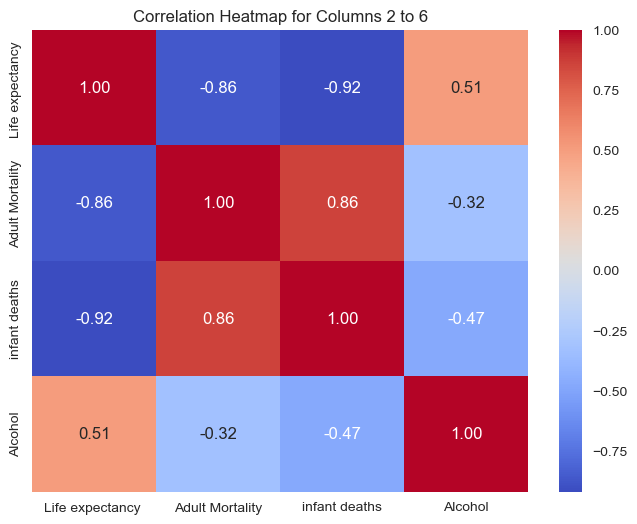

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_subset(data, start_column, end_column):
    """
    Create a heatmap to visualize the correlation matrix of a subset of columns in the data.

    Parameters:
    data (DataFrame): The input data.
    start_column (int): Index of the starting column.
    end_column (int): Index of the ending column.

    Returns:
    None
    """
    # Select the subset of columns
    subset_data = data.iloc[:, start_column:end_column+1]

    # Filter out non-numeric columns
    numeric_subset_data = subset_data.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_subset_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap for Columns {} to {}'.format(start_column, end_column))
    plt.show()

# Example usage for columns 4 to 6
plot_heatmap_subset(data, 2, 6)


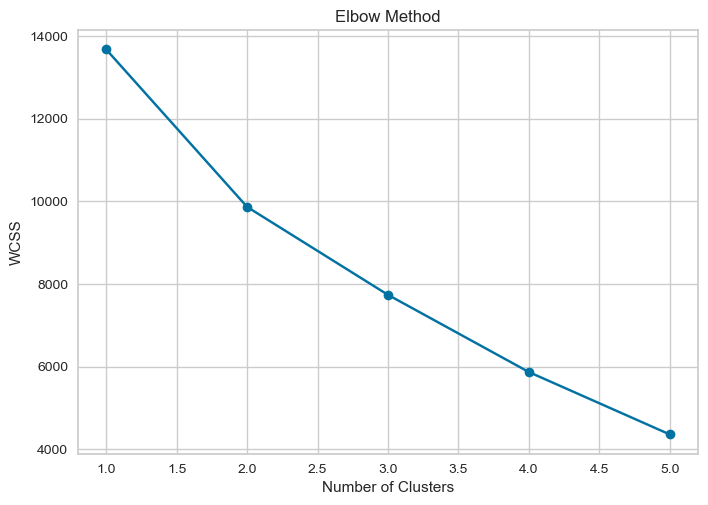

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


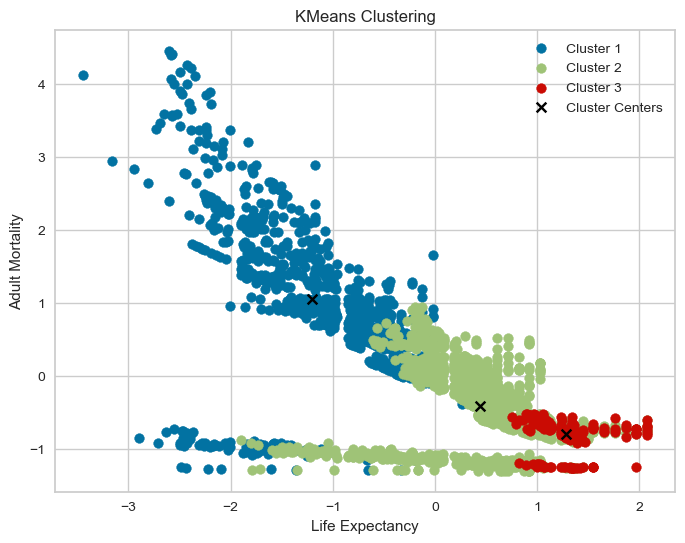

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.36549784451324613


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv('LifeExpectancyData.csv')

# Global variable for scaler
scaler = StandardScaler()

def preprocess_data(df):
    """
    Preprocess the data by handling missing values and selecting appropriate columns for clustering.

    Parameters:
        df: DataFrame containing the data.

    Returns:
        DataFrame: Preprocessed data.
    """
    # Select appropriate columns for clustering
    columns_for_clustering = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure']
    
    # Handle missing values
    df.dropna(subset=columns_for_clustering, inplace=True)
    
    return df[columns_for_clustering]

def performing_elbow_method(data_scaled):
    """
    Calculate the optimal number of clusters using the elbow method.

    Parameters:
        data_scaled: Rescaled data.

    Returns:
        integer: Optimal number of clusters.
    """
    # within cluster sum of squares
    wcss = []
    # Adjusted range to avoid ValueError
    for i in range(1, 6):
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Explicitly setting n_init
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    # Plotting the within-cluster sum of squares
    plt.plot(range(1, 6), wcss, marker='o')
    # Adding labels and title to the plot
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    # Adding grid
    plt.grid(True)
    plt.show()
    return 3

def visualize_clusters(data_scaled, optimal_num_clusters):
    """
    Visualizing the clusters based on the number of clusters.

    Parameters:
        data_scaled: Rescaled data.
        optimal_num_clusters: Optimal number of clusters.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    cluster_centers = kmeans.cluster_centers_
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Cluster Centers')
    # Adding labels and title to the plot
    plt.xlabel('Life Expectancy')
    plt.ylabel('Adult Mortality')
    plt.title('KMeans Clustering')
    plt.legend()
    # Adding grid
    plt.grid(True)
    plt.show()
    
    
def evaluate_clustering_accuracy(data_scaled, optimal_num_clusters):
    """
    Evaluate the accuracy of clustering predictions using silhouette score.

    Parameters:
        data_scaled: Rescaled data.
        optimal_num_clusters: Optimal number of clusters.

    Returns:
        float: Silhouette score.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    return silhouette_avg

# Preprocessing the data
data_processed = preprocess_data(data)

# Standardizing the data
data_scaled = scaler.fit_transform(data_processed)


# Performing the elbow method to determine the optimal number of clusters
optimal_num_clusters = performing_elbow_method(data_scaled)

# Visualizing the clusters
visualize_clusters(data_scaled, optimal_num_clusters)



# Evaluating clustering accuracy
silhouette_accuracy = evaluate_clustering_accuracy(data_scaled, optimal_num_clusters)
print("Silhouette Score:", silhouette_accuracy)


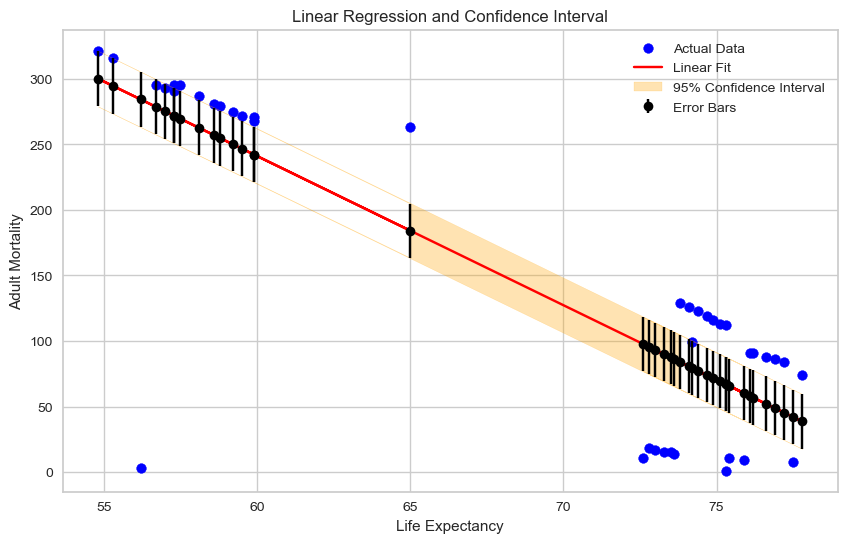

In [64]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
data = df.head(n=40)
def line_fit_and_plot(data):
    """
    Fit a linear regression model to the provided data and plot the results.

    Parameters:
        data: DataFrame containing appropriate columns.
    """
    X = data['Life expectancy '].values.reshape(-1)  # Independent variable
    y = data['Adult Mortality'].values  # Dependent variable

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)

    # Predictions
    y_pred = model.predict(X.reshape(-1, 1))

    # Confidence interval and error bars
    confidence = 0.95
    n = len(y)
    mse = np.mean((y - y_pred) ** 2)
    alpha = 1 - confidence
    t_critical = np.abs(stats.t.ppf(alpha / 2, df=n-1))
    margin_of_error = t_critical * np.sqrt((mse / n) * (1 + (1/n) + ((X - X.mean()) ** 2) / np.sum((X - X.mean()) ** 2)))
    confidence_interval = np.array([y_pred - margin_of_error, y_pred + margin_of_error])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Linear Fit')
    plt.fill_between(X, confidence_interval[0], confidence_interval[1], color='orange', alpha=0.3, label='95% Confidence Interval')
    plt.errorbar(X, y_pred, yerr=margin_of_error, fmt='o', color='black', label='Error Bars')

    # Labels and title
    plt.xlabel('Life Expectancy')
    plt.ylabel('Adult Mortality')
    plt.title('Linear Regression and Confidence Interval')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform line fitting and plot
line_fit_and_plot(data)


C:\Users\kisho\AppData\Local\Temp\ipykernel_10260\1333100625.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=columns_for_clustering, inplace=True)


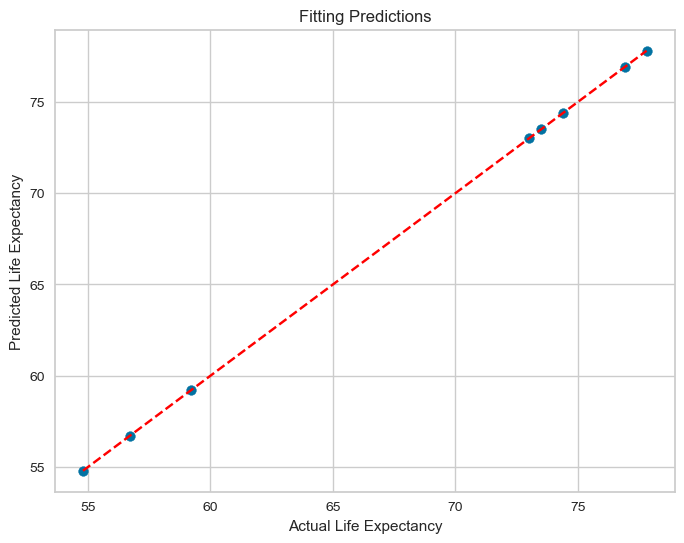

Mean Squared Error: 7.573064690121713e-29


In [65]:
# Preprocess the data
data_processed = preprocess_data(data)

# Define features (X) and target (y)
X = data_processed[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure']]
y = data_processed['Life expectancy ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Visualize the fitting predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Identity line
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Fitting Predictions')
plt.grid(True)
plt.show()

print("Mean Squared Error:", mse)
